In [1]:
import pandas as pd
import numpy as np

In [2]:
from keras.applications.vgg19 import VGG19

Using TensorFlow backend.


In [3]:
import cv2

In [4]:
import os

In [5]:
from imutils import paths

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
infected=list(paths.list_images('/content/drive/My Drive/Malaria/cell_images/Parasitized'))

In [8]:
normal=list(paths.list_images('/content/drive/My Drive/Malaria/cell_images/Uninfected'))

In [9]:
print("Number of Infected images:",len(infected))

Number of Infected images: 2150


In [10]:
print("Number of Normal images:",len(normal))

Number of Normal images: 2190


In [11]:
labels=[]

In [12]:
normal[1]

'/content/drive/My Drive/Malaria/cell_images/Uninfected/Uninfected/C129P90ThinF_IMG_20151004_134306_cell_52.png'

In [13]:
image_sample_normal=cv2.imread(normal[1])

Text(0.5, 1.0, 'Normal')

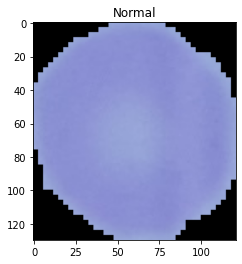

In [14]:
plt.imshow(image_sample_normal)
plt.title('Normal')

In [15]:
image_sample_infected=cv2.imread(infected[1])

Text(0.5, 1.0, 'Infected')

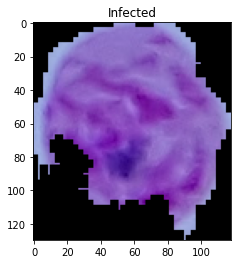

In [16]:
plt.imshow(image_sample_infected)
plt.title('Infected')

In [17]:
images=[]


In [18]:
labels=[]

In [19]:
for i in range(1500):
  label=infected[i].split(os.path.sep)[-2]
  labels.append(label)
  #Reading Images
  img=cv2.imread(infected[i])
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img=cv2.resize(img,(224,224))
  images.append(img)



In [20]:
for i in range(1500):

  label=normal[i].split(os.path.sep)[-2]
  labels.append(label)

  img=cv2.imread(normal[i])
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img=cv2.resize(img,(224,224))
  images.append(img)

In [21]:
images1=[]
labels1=[]

In [22]:
images=np.array(images)/255.0

In [23]:
images.shape

(3000, 224, 224, 3)

In [24]:
images1=images

In [25]:
images1.shape

(3000, 224, 224, 3)

In [26]:
labels1=labels

In [27]:
len(labels1)

3000

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label=LabelEncoder()

In [30]:
labels1=label.fit_transform(labels1)

In [31]:
X=images1

In [32]:
y=labels1

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [35]:
print(X_train1.shape,X_test.shape)

(2400, 224, 224, 3) (600, 224, 224, 3)


In [36]:
y_train1.shape

(2400,)

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.2, random_state=99)

In [38]:
print(X_train.shape,X_val.shape)

(1920, 224, 224, 3) (480, 224, 224, 3)


In [39]:
from keras.applications.vgg19 import VGG19

In [40]:
from keras.models import Model

In [41]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [42]:
from keras.optimizers import Adam

In [43]:
from keras.preprocessing.image import ImageDataGenerator

In [44]:
vgg19=VGG19(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='max')

80142336/80134624 [==============================] - 3s 0us/step


In [45]:
for i in vgg19.layers:
  i.trainable=False

In [46]:
layer1=Dense(50,activation='relu')(vgg19.output)

In [47]:
layer2=Dropout(0.3)(layer1)

In [48]:
layer3=Dense(30,activation='relu')(layer2)

In [49]:
layer4=Dropout(0.4)(layer3)

In [50]:
output_layer=Dense(1,activation='sigmoid')(layer4)

In [51]:
model=Model(inputs=vgg19.input,outputs=output_layer)

In [52]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [53]:
adam=Adam()

In [54]:
model.compile(optimizer=adam,metrics=['accuracy'],loss='binary_crossentropy')

In [55]:
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val))

Train on 1920 samples, validate on 480 samples
Epoch 1/50
1920/1920 [==============================] - 36s 19ms/step - loss: 0.7218 - accuracy: 0.5120 - val_loss: 0.6861 - val_accuracy: 0.5896
Epoch 2/50
1920/1920 [==============================] - 27s 14ms/step - loss: 0.6801 - accuracy: 0.5620 - val_loss: 0.6469 - val_accuracy: 0.6687
Epoch 3/50
1920/1920 [==============================] - 27s 14ms/step - loss: 0.6633 - accuracy: 0.5901 - val_loss: 0.6361 - val_accuracy: 0.6646
Epoch 4/50
1920/1920 [==============================] - 27s 14ms/step - loss: 0.6250 - accuracy: 0.6620 - val_loss: 0.5829 - val_accuracy: 0.7188
Epoch 5/50
1920/1920 [==============================] - 27s 14ms/step - loss: 0.5823 - accuracy: 0.7042 - val_loss: 0.5404 - val_accuracy: 0.7458
Epoch 6/50
1920/1920 [==============================] - 27s 14ms/step - loss: 0.5637 - accuracy: 0.7156 - val_loss: 0.5006 - val_accuracy: 0.7875
Epoch 7/50
1920/1920 [==============================] - 27s 14ms/step - loss:

In [57]:
ta=history.history['accuracy']
va=history.history['val_accuracy']

Text(0, 0.5, 'Accuracy')

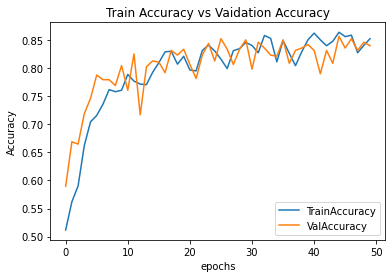

In [71]:
plt.plot(ta,label='TrainAccuracy')
plt.plot(va,label='ValAccuracy')
plt.legend()
plt.title('Train Accuracy vs Vaidation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [72]:
tl=history.history['loss']
vl=history.history['val_loss']

Text(0, 0.5, 'Loss')

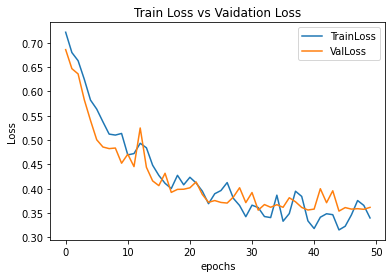

In [73]:
plt.plot(tl,label='TrainLoss')
plt.plot(vl,label='ValLoss')
plt.legend()
plt.title('Train Loss vs Vaidation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

In [74]:
test_pred=model.predict(X_test)

In [75]:
predictions=[]

In [76]:
for i in test_pred:
  if i>0.5:
    predictions.append(1)
  else:
    predictions.append(0)  


In [79]:
type(y_test)

numpy.ndarray

In [80]:
predictions=np.array(predictions)

In [81]:
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       301
           1       0.84      0.88      0.86       299

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



In [84]:
confusion_matrix(y_test,predictions)

array([[251,  50],
       [ 35, 264]])